# Ciência dos Dados - Projeto 1
Lucas Ohara

# Pergunta a ser respondida

Países Sul-Americanos paricipantes do Mercosul tem taxa de exportação mais elevada que aqueles que não participam do bloco? Ainda, considerando que as exportações de produto primário são grande parte das exportações Sul-Americanas, países com taxa de exportação elevada possuem menor IDH?

# Explicação
O mercosul é o bloco econômico Sul-Americano composto por Brasil, Paraguay, Uruguay, Venezuela e Argentina. Configura-se como uma  união aduaneira, na qual há livre comércio intrazona e política comercial comum entre os países-membros, um grande facilitador para relações comerciais com os mesmos. A vasta exportação de produtos primários proveniente de países Mercosul é responsável por boa parte do comércio internacional dos mesmos. Por exemplo, os países do Mercosul formam o maior bloco exportador de alimentos no mundo. Porém, países com alta taxa de exportação de produtos do setor primário e baixa taxa de exportação de produtos do setor secundário indicam baixo desenvolvimento tecnológico da indústria. 
Perante isso, a análise a ser realizada consiste na investigação dos dados recolhidos, baseada na hipótese:

O projeto abaixo se baseia em dados do ano de 2005 apenas, uma vêz que o banco de dados de IDH possui colunas de 10 em 10 anos, inúteis para uma análise contínua precisa. Além disso, o banco de dados da taxa de exportação(% do PiB), anual, só possui dados completos até 2005

# Dados

https://www.gapminder.org/data/ , palavras chave: "HDI", "Exports (p of GDP)"

http://www.mercosul.gov.br/saiba-mais-sobre-o-mercosul


In [198]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
#imporatndo bibliotecas

Dados do IDH de países Sul-Americanos

In [199]:
dados_DKM = pd.read_excel('Indicator_HDI.xlsx')
dados_IDH = dados_DKM.loc[:,["country",'HDI_2005']]
dados_IDH.head(12)
#leitura dos dados de IDH(x100)

,country,HDI_2005
0,Argentina,76.5
1,Bolivia,64.9
2,Brazil,69.2
3,Chile,77.9
4,Colombia,67.5
5,Ecuador,69.5
6,Paraguay,63.5
7,Peru,69.1
8,Uruguay,74.8
9,Venezuela,69.2


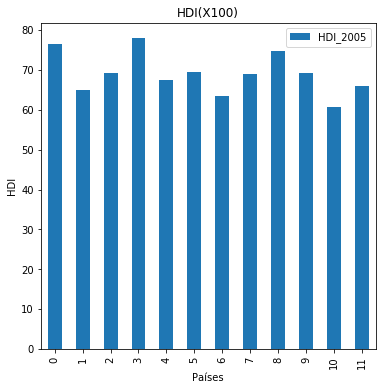

In [200]:
plot = dados_IDH.plot(kind='bar',title='HDI(X100)',figsize=(6, 6),)
plt.ylabel('HDI')
plt.xlabel('Países')
plt.show()

In [201]:
dados_REI = pd.read_excel('Exports (p of GDP).xlsx')
#leitura dos dados de exportação, % do PiB
dados_GDP = dados_REI.loc[:,["country", 'GDP_2005']]
dados_GDP.head(20)
#filtro das colunas


,country,GDP_2005
0,Argentina,25.067933
1,Bolivia,35.548143
2,Brazil,15.128351
3,Chile,38.382370
4,Colombia,16.849916
5,Ecuador,30.904340
6,Paraguay,50.236974
7,Peru,25.089326
8,Uruguay,30.404020
9,Venezuela,39.658653


Dados de % do PiB em exportação dos mesmos países.

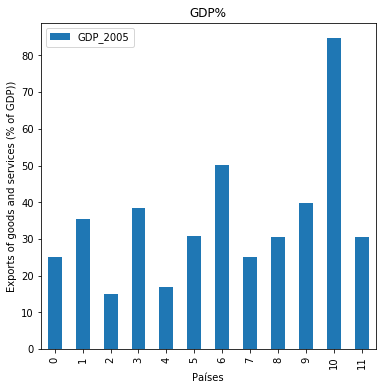

In [202]:
plot = dados_GDP.plot(kind='bar',title='GDP%',figsize=(6, 6),)
plt.ylabel('Exports of goods and services (% of GDP))')
plt.xlabel('Países')
plt.show()

# JOIN
União dos dados coletados em uma tabela única, o MERGE.

In [203]:
IDH_idx = dados_IDH.set_index('country')
GDP_idx = dados_GDP.set_index('country')
IDH_GDP = IDH_idx.join(GDP_idx, how='inner', lsuffix='_IDH', rsuffix='_GDP')
IDH_GDP.head(12)
#Junta os bancos de dados 

,HDI_2005,GDP_2005
country,,
Argentina,76.5,25.067933
Bolivia,64.9,35.548143
Brazil,69.2,15.128351
Chile,77.9,38.382370
Colombia,67.5,16.849916
Ecuador,69.5,30.904340
Paraguay,63.5,50.236974
Peru,69.1,25.089326
Uruguay,74.8,30.404020


# Adicionando coluna qualitativa

Agora que o MERGE foi realizado, pode-se fazer uma avaliação qualitativa dos dados. Para isso, será adicionada uma terceira coluna que indica os países que fazem parte do Mercosul, e aqueles não participantes.

In [204]:
IDH_GDP['Mercosul'] = 'Nao_Participante'
lista_Mercosul = ['Brazil', 'Venezuela', 'Uruguay', 'Paraguay', 'Argentina']
IDH_GDP.loc[lista_Mercosul, 'Mercosul'] = 'Participante'
IDH_GDP.head(12)

,HDI_2005,GDP_2005,Mercosul
country,,,
Argentina,76.5,25.067933,Participante
Bolivia,64.9,35.548143,Nao_Participante
Brazil,69.2,15.128351,Participante
Chile,77.9,38.382370,Nao_Participante
Colombia,67.5,16.849916,Nao_Participante
Ecuador,69.5,30.904340,Nao_Participante
Paraguay,63.5,50.236974,Participante
Peru,69.1,25.089326,Nao_Participante
Uruguay,74.8,30.404020,Participante


# Gráfico 1 
Neste primeiro gráfico, já se pode obter uma noção de alguns conceitos. Primeiramente, pode-se perceber uma correlação entre alta taxa de exportação no GDP do país e um baixo IDH, e vice-versa. Por exemplo, a Guyana possui a mais alta % de exportação e o mais baixo IDH. Na teoria, isso somente se aplica a países cuja exportação é baseada fortemente no setor primário. No caso da Guyana, mineiração e agricultura são responsáveis por cerca de 75% do valor das exportações do país. Logo depois, temos o Paraguay, com o segundo IDH mais baixo dos países Sul-Americanos, mas a segunda maior taxa de exportação (%GDP).

O contrário equivale para a Argentina, que possui 54% de suas importações provenientes da agricultura, como o plantio de trigo. O IDH da Argentina se encontra entre os mais altos do continente.

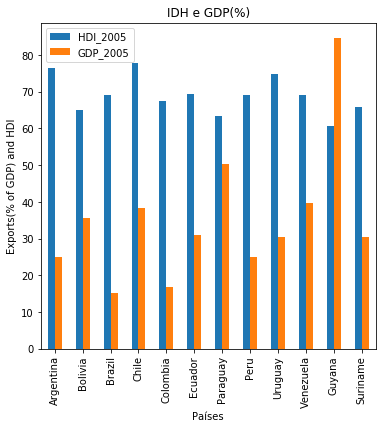

In [205]:
plot = IDH_GDP.plot(kind='bar',title='IDH e GDP(%)',figsize=(6, 6),)
plt.ylabel('Exports(% of GDP) and HDI')
plt.xlabel('Países')
plt.show()

# Gráficos 2 e 3
Agora, vejamos as médias das taxas de exportação (% do PiB) dos países sul-americanos no Mercosul e fora dele. De acordo com a hipótese, os países dentro do Mercosul devem ter uma vantagem neste quesito, já que o Mercosul facilita o comércio internacional e possui uma zona interna de livre-comércio entre suas nações.

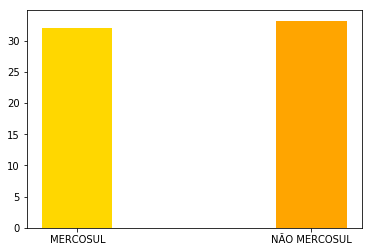

In [206]:
y_axis = [32.0988, 33.1911]
x_axis = ['MERCOSUL', 'NÃO MERCOSUL']
width_n = 0.3
bar_color = 'gold', 'orange'

plt.bar(x_axis, y_axis, width=width_n, color=bar_color)
plt.show()


É, como podemos ver, o resultado apresentado no gráfico 2 é o contrário do esperado. Os países sul-americanos fora do Mercosul obtiveram média superior aos participantes do bloco. Porém, pode-se deduzir que a Guyana cumpre um papel nisso, afinal, a sua taxa é uma disparidade considerável em relação aos outros países. Como mencionado anteriormente, a atividade mineradora da Guyana é uma das suas maiores (e únicas) contribuições para o PiB do país. Dessa forma, é uma escolha válida eliminar a Guyana da média dos países "Não Mercosul", calculando-a sem os dados da Guyana.  

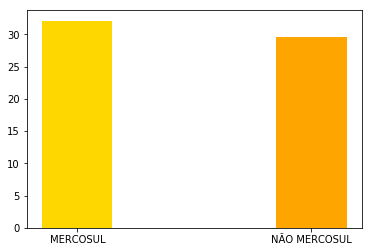

In [207]:
y_axis = [32.0988, 29.532]
x_axis = ['MERCOSUL', 'NÃO MERCOSUL']
width_n = 0.3
bar_color = 'gold', 'orange'

plt.bar(x_axis, y_axis, width=width_n, color=bar_color)
plt.show()

O novo resultado mostra um resultado mais favorável ao previsto pela hipótese, com cerca uma diferença de cerca de 3%.

# Gráficos 4 e 5
Comparemos agora os 3 maiores IDH´s da América do Sul e suas respectivas taxas de exportação (% do PiB) com os 3 menores.

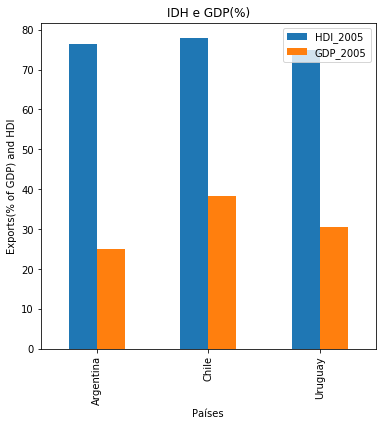

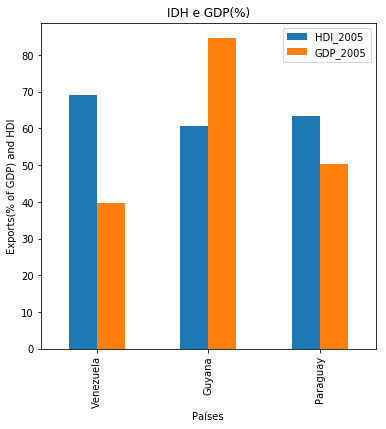

In [208]:
ACU=IDH_GDP.loc[['Argentina', 'Chile', 'Uruguay']]
VGP=IDH_GDP.loc[['Venezuela', 'Guyana', 'Paraguay']]
plot = ACU.plot(kind='bar',title='IDH e GDP(%)',figsize=(6, 6),)
plt.ylabel('Exports(% of GDP) and HDI')
plt.xlabel('Países')
plt.show()

plot = VGP.plot(kind='bar',title='IDH e GDP(%)',figsize=(6, 6),)
plt.ylabel('Exports(% of GDP) and HDI')
plt.xlabel('Países')
plt.show()


Após compararmos os dois gráficos, fica mais clara a correlação entre o baixo IDH, e a alta porcentagem do PiB proveniente de exportação de produto primário.

# Gráfico 6
O próximo gráfico, em scatter (y=Exportação(%GDP), x=IDH), representa a relação inversa entre IDH e taxa de exportação (% do PiB). O eixo x do gráfico está invertido, para alinhar geograficamente no gráfico as posições dos países em questão de alto IDH e baixa taxa de exportação. No caso, os países mais à esquerda são aqueles com melhor IDH e por causa da correlação, possuem todos uma baixa taxa de exportação(% do PiB) se comparados com o resto.

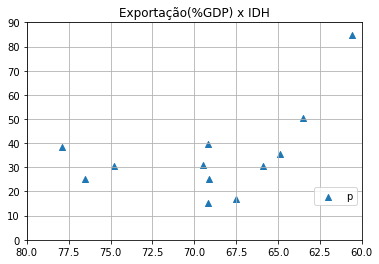

In [209]:
plot=plt.scatter(IDH_GDP['HDI_2005'],IDH_GDP['GDP_2005'],marker='^')
plt.legend(("países"),loc='center right', bbox_to_anchor=(1,0.2))
plt.title('Exportação(%GDP) x IDH')
plt.xlim(80,60)
plt.ylim(0,90)
plt.grid(True)
plt.show()

# Conclusão
Após realizar as análises dos gráficos e tabelas, podemos concluír que existe uma vantagem comercial de exportação para aqueles países participantes do Mercosul. Cerca de 3% é uma diferença considerável nas médias das taxas de exportação. Porém, deve-se reiterar que foi excluída do cálculo, por causa da enorme disparidade, a Guyana, com o menor IDH dos países analizados. A hipótese, portanto, foi apenas parcialmente confirmada.

Podemos concluir também, com maior certeza, que existe uma correlaçao inversa entre a taxa de exportação(% do PiB) e o valor do IDH do país. Os gráficos 4,5 e 6 demonstram com clareza a disparidade. O Chile, mesmo com taxa média de exportação, tem o maior IDH da América do Sul. A Guyana, com a maior taxa, possui o menor IDH. Vale lembrar que essa correlação existe apenas no fato de que os países sul-americanos exportam principalmente produtos primários. Essa mesma correlação não é válida para países com altas parcelas do PiB provenientes de exportações de produtos industrializados, tecnológicos. Nestes casos, o contrário é valido, e o IDH sobe com as exportações. 

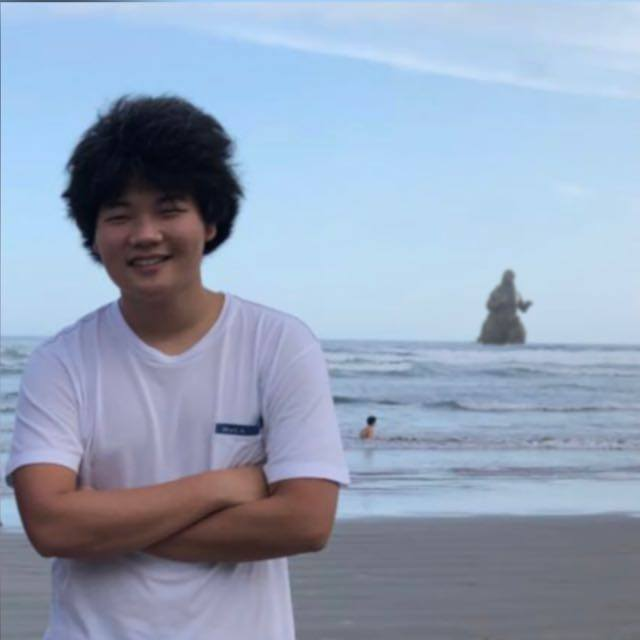